In [92]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons, load_digits
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    confusion_matrix
    )

plt.style.use("ggplot")

In [4]:
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)

In [5]:
X.shape

(1000, 2)

In [6]:
y.shape

(1000,)

In [13]:
def sumar_valores(*args, **kwargs):
    print(args)
    print(kwargs)

In [14]:
sumar_valores(1, 2, 3, 4, test="uno", valor=2)

(1, 2, 3, 4)
{'test': 'uno', 'valor': 2}


In [15]:
sumar_valores(1, 2, 3)

(1, 2, 3)
{}


In [17]:
x = [1, 2, 3]
sumar_valores(*x)

(1, 2, 3)
{}


Text(0, 0.5, 'Count')

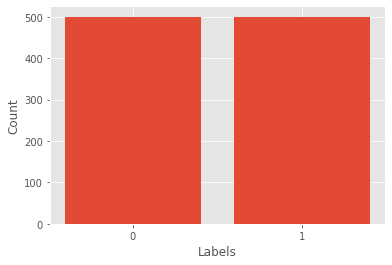

In [19]:
fig, ax = plt.subplots()
ax.bar(*np.unique(y, return_counts=True))
ax.set_xticks([0, 1])
ax.set_xlabel("Labels")
ax.set_ylabel("Count")

Text(0, 0.5, '$x_2$')

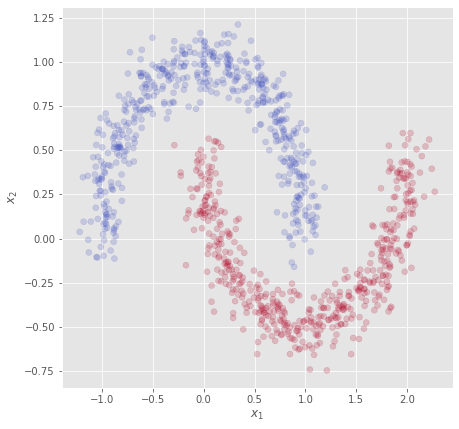

In [22]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", alpha=0.2)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")

In [30]:
gamma_range = np.logspace(-3, 5, 9)
gamma_range

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04,
       1.e+05])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y
    )

In [32]:
models = []
accs_train = []
accs_test = []
for gamma in gamma_range:
    clf = SVC(gamma=gamma).fit(X_train, y_train)
    models.append(clf)
    accs_train.append(clf.score(X_train, y_train))
    accs_test.append(clf.score(X_test, y_test))

In [34]:
1e-3

0.001

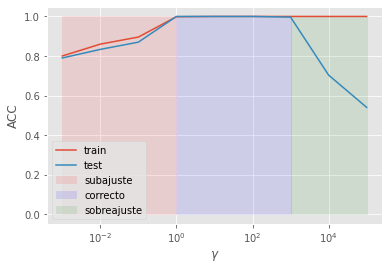

In [36]:
fig, ax = plt.subplots()
ax.fill_between(
    [1e-3, 1], np.zeros(2), np.ones(2), alpha=0.1,
    label="subajuste", color="r"
    )
ax.fill_between(
    [1, 1e3], np.zeros(2), np.ones(2), alpha=0.1,
    label="correcto", color="b"
    )
ax.fill_between(
    [1e3, 1e5], np.zeros(2), np.ones(2), alpha=0.1,
    label="sobreajuste", color="g"
    )
ax.semilogx(gamma_range, accs_train, label="train")
ax.semilogx(gamma_range, accs_test, label="test")
ax.set_xlabel("$\\gamma$")
ax.set_ylabel("ACC")
ax.legend()

In [41]:
def decision_region(X, y, model, ax):
    x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 200)
    x2 = np.linspace(X[:, 1].min(), X[:, 1].max(), 200)
    X1_grid, X2_grid = np.meshgrid(x1, x2)
    X_grid = np.concatenate(
        [X1_grid.reshape(-1, 1), X2_grid.reshape(-1, 1)],
        axis=1
        )
    y_pred = model.predict(X_grid)
    ax.contourf(
        X1_grid, X2_grid,
        y_pred.reshape(X1_grid.shape),
        cmap="coolwarm", alpha=0.2
        )
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", alpha=0.4)

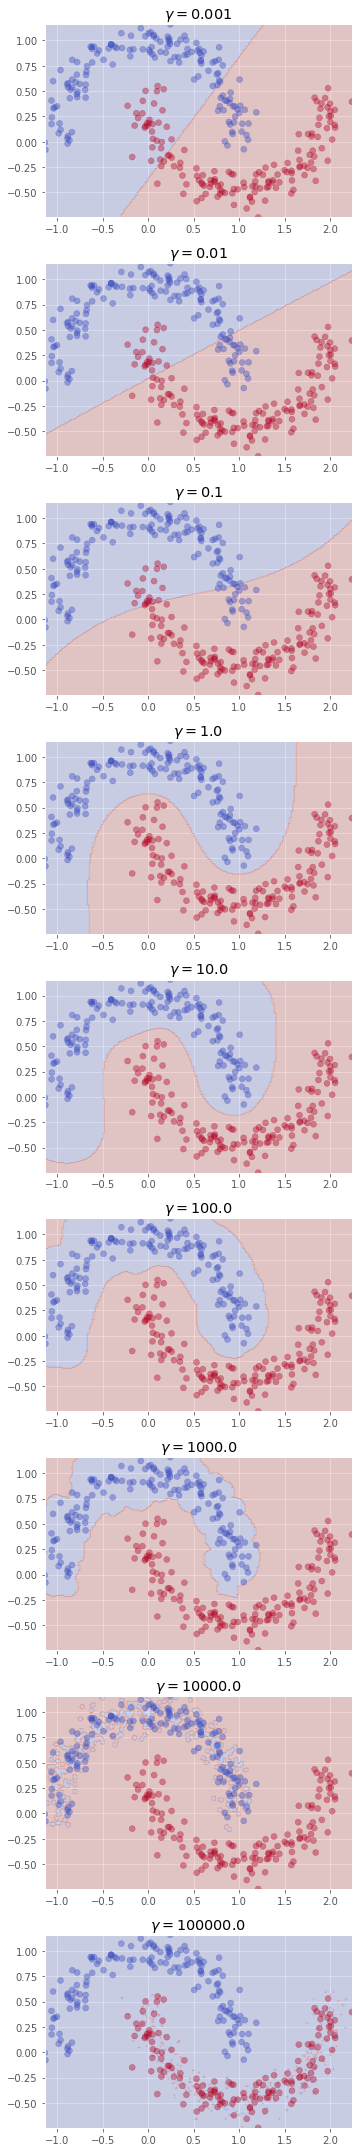

In [42]:
fig, axes = plt.subplots(gamma_range.size, 1, figsize=(5, 30))
for i in range(gamma_range.size):
    ax = axes[i]
    decision_region(X_test, y_test, models[i], ax)
    ax.set_title(f"$\\gamma={gamma_range[i]}$")
fig.tight_layout()

In [44]:
X, y = load_digits(return_X_y=True)

In [45]:
X.shape

(1797, 64)

In [46]:
y.shape

(1797,)

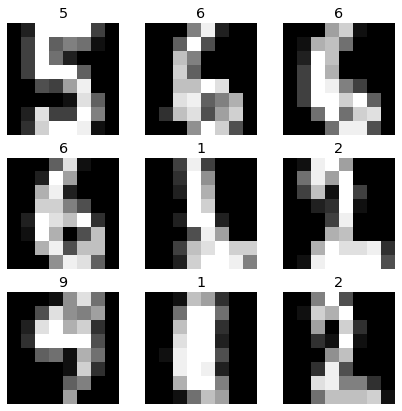

In [49]:
fig, axes = plt.subplots(3, 3, figsize=(7, 7))
for i in range(3):
    for j in range(3):
        ax = axes[i, j]
        idx = np.random.randint(X.shape[0])
        img = X[idx]
        y_img = y[idx]
        ax.imshow(img.reshape(8, 8), cmap="gray")
        ax.axis("off")
        ax.set_title(y_img)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y
    )

In [53]:
prep = StandardScaler().fit(X_train)

In [54]:
X_train_p = prep.transform(X_train)
X_test_p = prep.transform(X_test)

In [58]:
gamma_range = np.logspace(-6, 1, 8)
gamma_range

array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])

In [59]:
models = []
accs_train = []
accs_test = []
for gamma in gamma_range:
    clf = SVC(gamma=gamma).fit(X_train_p, y_train)
    models.append(clf)
    accs_train.append(clf.score(X_train_p, y_train))
    accs_test.append(clf.score(X_test_p, y_test))

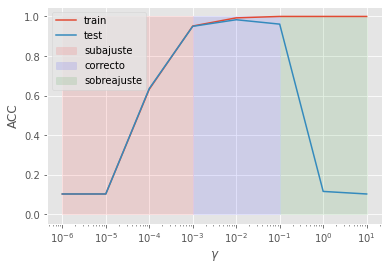

In [61]:
fig, ax = plt.subplots()
ax.fill_between(
    [1e-6, 1e-3], np.zeros(2), np.ones(2), alpha=0.1,
    label="subajuste", color="r"
    )
ax.fill_between(
    [1e-3, 1e-1], np.zeros(2), np.ones(2), alpha=0.1,
    label="correcto", color="b"
    )
ax.fill_between(
    [1e-1, 1e1], np.zeros(2), np.ones(2), alpha=0.1,
    label="sobreajuste", color="g"
    )
ax.semilogx(gamma_range, accs_train, label="train")
ax.semilogx(gamma_range, accs_test, label="test")
ax.set_xlabel("$\\gamma$")
ax.set_ylabel("ACC")
ax.legend()

In [62]:
idx = np.argmax(accs_test)

In [64]:
best_model = models[idx]

In [65]:
best_model

SVC(gamma=0.01)

In [66]:
best_model.score(X_test_p, y_test)

0.9833333333333333

(-0.5, 7.5, 7.5, -0.5)

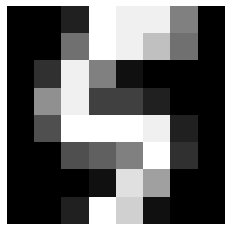

In [77]:
x_pred = X_test[18]
img = x_pred.reshape(8, 8)
plt.imshow(img, cmap="gray")
plt.axis("off")

In [78]:
x_pred.reshape(1, -1).shape

(1, 64)

In [79]:
x_pred_p = prep.transform(x_pred.reshape(1, -1))

In [80]:
y_pred = best_model.predict(x_pred_p)

In [81]:
y_pred

array([5])

In [87]:
y_pred = best_model.predict(X_test_p)

In [88]:
accuracy_score(y_test, y_pred)

0.9833333333333333

In [89]:
precision_score(y_test, y_pred, average="micro")

0.9833333333333333

In [90]:
precision_score(y_test, y_pred, average="macro")

0.983754325780145

In [91]:
f1_score(y_test, y_pred, average="macro")

0.9833768519851261

In [94]:
X_test.shape

(540, 64)

In [96]:
X_test[y_test == 1].shape

(55, 64)

In [98]:
confusion_matrix(y_test, y_pred)

array([[54,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 54,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0, 52,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 54,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 53,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  1, 53,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 54,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 54,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 51,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  1, 52]])